### 1) Write a python program to compute Mean, Median, Mode, Variance, Standard Deviation using Datasets

In [ ]:
import numpy as np
from scipy import stats

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10]

mean = np.mean(data)
print(f"Mean: {mean}")

median = np.median(data)
print(f"Median: {median}")

mode_result = stats.mode(data)

if np.isscalar(mode_result.mode):
    mode = mode_result.mode
    count = mode_result.count
else:
    mode = mode_result.mode[0]
    count = mode_result.count[0]

print(f"Mode: {mode} (appears {count} times)")

variance = np.var(data)
print(f"Variance: {variance}")

std_dev = np.std(data)
print(f"Standard Deviation: {std_dev}")

Mean: 5.909090909090909
Median: 6.0
Mode: 10 (appears 2 times)
Variance: 9.173553719008265
Standard Deviation: 3.0287874998104876


### 2) Demonstrate various data pre-processing techniques for a given dataset. Write a python program to compute
i. Reshaping the data,  
ii. Filtering the data,  
iii. Merging the data  
iv. Handling the missing values in datasets  
v. Feature Normalization: Min-max normalization


## Load data


Create or load a sample dataset using pandas to demonstrate the techniques.


In [ ]:
import pandas as pd
import numpy as np

data = {
    'ID': range(1, 16),
    'Score': np.random.randint(50, 100, 15),
    'Category': ['A'] * 5 + ['B'] * 5 + ['C'] * 5,
    'City': ['New York', 'London', 'Paris', 'Tokyo', 'Sydney'] * 3,
    'Value': np.random.rand(15) * 100
}
df = pd.DataFrame(data)
display(df)

,ID,Score,Category,City,Value
0,1,75,A,New York,47.969720
1,2,89,A,London,99.631885
2,3,81,A,Paris,78.677507
3,4,53,A,Tokyo,46.669513
4,5,90,A,Sydney,8.501409
5,6,50,B,New York,13.911900
6,7,69,B,London,53.232994
7,8,63,B,Paris,6.758714
8,9,52,B,Tokyo,83.395796
9,10,70,B,Sydney,7.843448


## Reshaping data

Demonstrate how to reshape the data using techniques like melting or pivoting.


In [ ]:
melted_df = pd.melt(df, id_vars=['ID', 'Category', 'City'], value_vars=['Score', 'Value'])
display(melted_df)

pivoted_df = melted_df.pivot_table(index=['ID', 'Category', 'City'], columns='variable', values='value').reset_index()
display(pivoted_df)

,ID,Category,City,variable,value
0,1,A,New York,Score,75.000000
1,2,A,London,Score,89.000000
2,3,A,Paris,Score,81.000000
3,4,A,Tokyo,Score,53.000000
4,5,A,Sydney,Score,90.000000
5,6,B,New York,Score,50.000000
6,7,B,London,Score,69.000000
7,8,B,Paris,Score,63.000000
8,9,B,Tokyo,Score,52.000000
9,10,B,Sydney,Score,70.000000


variable,ID,Category,City,Score,Value
0,1,A,New York,75.0,47.969720
1,2,A,London,89.0,99.631885
2,3,A,Paris,81.0,78.677507
3,4,A,Tokyo,53.0,46.669513
4,5,A,Sydney,90.0,8.501409
5,6,B,New York,50.0,13.911900
6,7,B,London,69.0,53.232994
7,8,B,Paris,63.0,6.758714
8,9,B,Tokyo,52.0,83.395796
9,10,B,Sydney,70.0,7.843448


## Filtering data

Show how to filter the data based on specific conditions.


In [ ]:
filtered_df_category = df[df['Category'] == 'A']
display(filtered_df_category)

filtered_df_score = df[df['Score'] > 80]
display(filtered_df_score)

filtered_df_city_value = df[(df['City'] == 'London') & (df['Value'] < 50)]
display(filtered_df_city_value)

,ID,Score,Category,City,Value
0,1,75,A,New York,47.969720
1,2,89,A,London,99.631885
2,3,81,A,Paris,78.677507
3,4,53,A,Tokyo,46.669513
4,5,90,A,Sydney,8.501409


,ID,Score,Category,City,Value
1,2,89,A,London,99.631885
2,3,81,A,Paris,78.677507
4,5,90,A,Sydney,8.501409
12,13,87,C,Paris,0.950714
14,15,89,C,Sydney,80.376310


,ID,Score,Category,City,Value
11,12,68,C,London,11.51102


## Merging data

Create a second sample dataset and demonstrate how to merge it with the first dataset.


In [ ]:
data2 = {
    'ID': range(1, 11),  # Common column with df
    'Department': ['Sales'] * 5 + ['Marketing'] * 5,
    'Salary': np.random.randint(50000, 100000, 10)
}
df2 = pd.DataFrame(data2)
display(df2)

,ID,Department,Salary
0,1,Sales,73502
1,2,Sales,60938
2,3,Sales,88580
3,4,Sales,71076
4,5,Sales,80455
5,6,Marketing,76646
6,7,Marketing,56001
7,8,Marketing,61562
8,9,Marketing,92279
9,10,Marketing,59140


In [ ]:
merged_df = pd.merge(df, df2, on='ID', how='inner')
display(merged_df)

,ID,Score,Category,City,Value,Department,Salary
0,1,75,A,New York,47.969720,Sales,73502
1,2,89,A,London,99.631885,Sales,60938
2,3,81,A,Paris,78.677507,Sales,88580
3,4,53,A,Tokyo,46.669513,Sales,71076
4,5,90,A,Sydney,8.501409,Sales,80455
5,6,50,B,New York,13.911900,Marketing,76646
6,7,69,B,London,53.232994,Marketing,56001
7,8,63,B,Paris,6.758714,Marketing,61562
8,9,52,B,Tokyo,83.395796,Marketing,92279
9,10,70,B,Sydney,7.843448,Marketing,59140


## Handle missing values

Introduce missing values into the dataset (if not already present) and demonstrate techniques for handling them (e.g., imputation, deletion).


In [ ]:
np.random.seed(42) # for reproducibility
for col in ['Score', 'Value', 'Salary']:
    merged_df.loc[merged_df.sample(frac=0.1).index, col] = np.nan

display(merged_df)

,ID,Score,Category,City,Value,Department,Salary
0,1,75.0,A,New York,NaN,Sales,73502.0
1,2,89.0,A,London,99.631885,Sales,60938.0
2,3,81.0,A,Paris,78.677507,Sales,88580.0
3,4,53.0,A,Tokyo,46.669513,Sales,71076.0
4,5,90.0,A,Sydney,8.501409,Sales,80455.0
5,6,50.0,B,New York,13.911900,Marketing,76646.0
6,7,69.0,B,London,53.232994,Marketing,56001.0
7,8,63.0,B,Paris,6.758714,Marketing,61562.0
8,9,NaN,B,Tokyo,83.395796,Marketing,92279.0
9,10,70.0,B,Sydney,7.843448,Marketing,NaN


In [ ]:
merged_df_filled = merged_df.copy()
for col in ['Score', 'Value', 'Salary']:
    mean_value = merged_df_filled[col].mean()
    merged_df_filled[col].fillna(mean_value, inplace=True)

display(merged_df_filled)

/tmp/ipython-input-10-161628369.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df_filled[col].fillna(mean_value, inplace=True)


,ID,Score,Category,City,Value,Department,Salary
0,1,75.000000,A,New York,44.291463,Sales,73502.000000
1,2,89.000000,A,London,99.631885,Sales,60938.000000
2,3,81.000000,A,Paris,78.677507,Sales,88580.000000
3,4,53.000000,A,Tokyo,46.669513,Sales,71076.000000
4,5,90.000000,A,Sydney,8.501409,Sales,80455.000000
5,6,50.000000,B,New York,13.911900,Marketing,76646.000000
6,7,69.000000,B,London,53.232994,Marketing,56001.000000
7,8,63.000000,B,Paris,6.758714,Marketing,61562.000000
8,9,71.111111,B,Tokyo,83.395796,Marketing,92279.000000
9,10,70.000000,B,Sydney,7.843448,Marketing,73448.777778


## Feature normalization

Demonstrate min-max normalization on a numerical column.


In [ ]:
score_min = merged_df_filled['Score'].min()
score_max = merged_df_filled['Score'].max()
merged_df_filled['Score_normalized'] = (merged_df_filled['Score'] - score_min) / (score_max - score_min)
display(merged_df_filled)

,ID,Score,Category,City,Value,Department,Salary,Score_normalized
0,1,75.000000,A,New York,44.291463,Sales,73502.000000,0.625000
1,2,89.000000,A,London,99.631885,Sales,60938.000000,0.975000
2,3,81.000000,A,Paris,78.677507,Sales,88580.000000,0.775000
3,4,53.000000,A,Tokyo,46.669513,Sales,71076.000000,0.075000
4,5,90.000000,A,Sydney,8.501409,Sales,80455.000000,1.000000
5,6,50.000000,B,New York,13.911900,Marketing,76646.000000,0.000000
6,7,69.000000,B,London,53.232994,Marketing,56001.000000,0.475000
7,8,63.000000,B,Paris,6.758714,Marketing,61562.000000,0.325000
8,9,71.111111,B,Tokyo,83.395796,Marketing,92279.000000,0.527778
9,10,70.000000,B,Sydney,7.843448,Marketing,73448.777778,0.500000


### 3) Implement Dimensionality reduction using Principle component Analysis method

### Implement Dimensionality reduction using Principal Component Analysis method

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

numerical_cols = merged_df_filled.select_dtypes(include=np.number).columns.tolist()
features_for_pca = merged_df_filled[numerical_cols].drop(columns=['ID', 'Score_normalized'])

display(features_for_pca.head())

,Score,Value,Salary
0,75.0,44.291463,73502.0
1,89.0,99.631885,60938.0
2,81.0,78.677507,88580.0
3,53.0,46.669513,71076.0
4,90.0,8.501409,80455.0


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_pca)

display(scaled_features)

array([[ 3.04145513e-01, -2.16203981e-16,  4.75898237e-03],
       [ 1.39906936e+00,  1.68389865e+00, -1.11867879e+00],
       [ 7.73398590e-01,  1.04629874e+00,  1.35299160e+00],
       [-1.41644910e+00,  7.23593294e-02, -2.12167158e-01],
       [ 1.47727821e+00, -1.08901995e+00,  6.26476811e-01],
       [-1.65107564e+00, -9.24389504e-01,  2.85886676e-01],
       [-1.65107564e-01,  2.72072953e-01, -1.56013153e+00],
       [-6.34360641e-01, -1.14204668e+00, -1.06288245e+00],
       [ 0.00000000e+00,  1.18986685e+00,  1.68374585e+00],
       [-8.68987180e-02, -1.10904039e+00,  0.00000000e+00]])

,principal component 1,principal component 2
0,0.200084,-0.084510
1,1.609172,-1.839229
2,1.698616,0.784703
3,-0.954629,0.200483
4,0.476469,0.403058


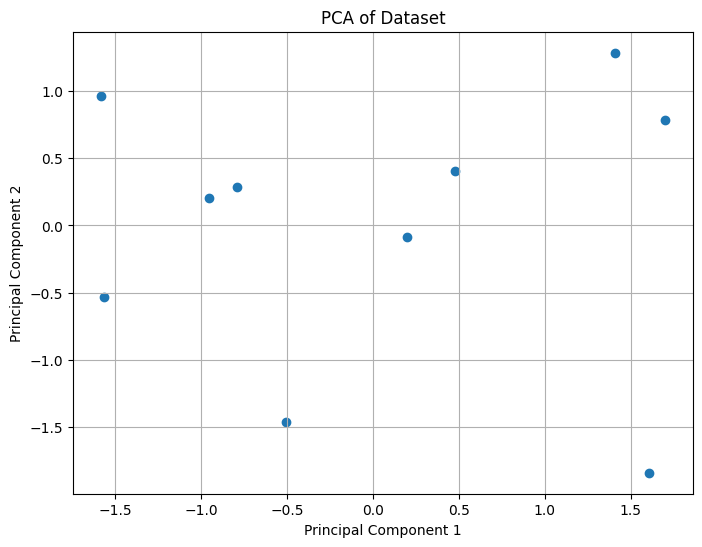

Explained variance ratio by each component: [0.48242323 0.3096313 ]
Total explained variance by 2 components: 0.7920545313932975


In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])

display(pca_df.head())

plt.figure(figsize=(8,6))
plt.scatter(pca_df['principal component 1'], pca_df['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.grid(True)
plt.show()

print(f"Explained variance ratio by each component: {pca.explained_variance_ratio_}")
print(f"Total explained variance by 2 components: {pca.explained_variance_ratio_.sum()}")